In [160]:
# import packages and libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [161]:
# helper function to load data
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [162]:
# load the splited data
X, Y, X_test, Y_test, _ = load_data()

In [163]:
# print the shapes
print("X train shape =", X.shape)
print("Y train shape =", Y.shape)
print("X test shape =", X_test.shape)
print("Y test shape =", Y_test.shape)

X train shape = (209, 64, 64, 3)
Y train shape = (1, 209)
X test shape = (50, 64, 64, 3)
Y test shape = (1, 50)


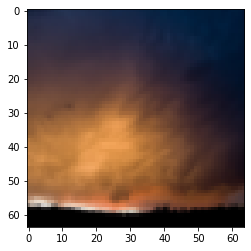

In [164]:
# show an example from the data
plt.imshow(X[0])

In [165]:
# number of samples
m = X.shape[0]
# flatten the images
X = X.reshape(m, -1).T
# number of input features
n = X.shape[0]
# initialise the matrix of weights randomly
W = np.random.randn(n ,1) * 0.01
b = 0 # bias = 0


In [166]:
# defining sigmoid function
def sigmoid(x): 
  return 1 / (1 + np.exp(-x))

In [167]:
# training the model
num_epochs = 800
learning_rate = 0.0005
print(W)
for i in range(num_epochs):
  # forward pass
  A = sigmoid(W.T @ X + b)

  # cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
  accuracy = np.sum(A == Y) / m
  if i % 10 == 0:
    print("Epoch =", i, "Accuracy = ", str(accuracy) + '%')
  # calculate the gradients
  dW = (1 / m) * X @ (A - Y).T
  db = (1 / m) * np.sum(A - Y)
  # update the weights
  W -= learning_rate * dW
  b -= learning_rate * db


[[ 0.00521375]
 [-0.0136573 ]
 [-0.0109373 ]
 ...
 [ 0.01003455]
 [-0.00066214]
 [ 0.00217222]]
Epoch = 0 Accuracy =  0.06220095693779904%
Epoch = 10 Accuracy =  0.3444976076555024%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch = 20 Accuracy =  0.6555023923444976%
Epoch = 30 Accuracy =  0.6842105263157895%
Epoch = 40 Accuracy =  0.35406698564593303%
Epoch = 50 Accuracy =  0.6555023923444976%
Epoch = 60 Accuracy =  0.7033492822966507%
Epoch = 70 Accuracy =  0.41148325358851673%
Epoch = 80 Accuracy =  0.6555023923444976%
Epoch = 90 Accuracy =  0.6555023923444976%
Epoch = 100 Accuracy =  0.8038277511961722%
Epoch = 110 Accuracy =  0.7464114832535885%
Epoch = 120 Accuracy =  0.8325358851674641%
Epoch = 130 Accuracy =  0.6555023923444976%
Epoch = 140 Accuracy =  0.6555023923444976%
Epoch = 150 Accuracy =  0.6555023923444976%
Epoch = 160 Accuracy =  0.7033492822966507%
Epoch = 170 Accuracy =  0.8516746411483254%
Epoch = 180 Accuracy =  0.6555023923444976%
Epoch = 190 Accuracy =  0.6555023923444976%
Epoch = 200 Accuracy =  0.8516746411483254%
Epoch = 210 Accuracy =  0.6555023923444976%
Epoch = 220 Accuracy =  0.6842105263157895%
Epoch = 230 Accuracy =  0.8755980861244019%
Epoch = 240 Accuracy =  0.875598086124

In [168]:
# number of samples in the test set
m_test = X_test.shape[0]

# reshape the test set
X_test = X_test.reshape(m_test, -1).T

# make the predictions
Z = W.T @ X_test + b
A = sigmoid(Z)

# calculate and print the accuracy on the test set
accuracy = np.sum(A == Y_test) / m_test
print("Accuracy =", accuracy)

Accuracy = 0.7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
# predict the result of one image (in case you need it)
def predict(img):
  # reshape the image
  img = img.reshape(1, -1).T
  # make prediction
  Z = W.T @ X + b
  A = sigmoid(Z)
  # return (1: cat, 0: non-cat)
  if (A > 0.5): 
    return 1
  return 0